<a href="https://colab.research.google.com/github/Dfgr109109/proyecto/blob/main/Capitulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capitulo 3**
### 1. Maximizar la función f(x)=x sen(10 π x) + 1, con x ∈[0,1].


In [ ]:
# INSTALAR DEAP
!pip install deap

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Definir el problema de maximización
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_func(individual):
    x = individual[0]
    return (x * np.sin(10 * np.pi * x) + 1,)

toolbox.register("evaluate", eval_func)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=1.0)
toolbox.register("select", tools.selTournament, tournsize=3)

# Ejecutar AG
population = toolbox.population(n=50)
result, log = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=50, verbose=False)

best = tools.selBest(population, k=1)[0]
print(f"Mejor x encontrado: {best[0]:.5f}")
print(f"Máximo valor de f(x): {eval_func(best)[0]:.5f}")


Mejor x encontrado: 1.85093
Máximo valor de f(x): 2.85014


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


2. Verdadera democracia. Suponga que usted es el jefe de gobierno y está interesado en que pasen los proyectos de su programa político. Sin embargo, en el congreso conformado por 5 partidos, no es fácil su tránsito, por lo que debe repartir el poder, conformado por ministerios y otras agencias del gobierno, con base en la representación de cada partido. Cada entidad estatal tiene un  peso de poder, que es el que se debe distribuir. Suponga que hay 50 curules, distribuya aleatoriamente, con una distribución no informe entre los 5 partidos esas curules. Defina una lista de 50 entidades y asígneles aleatoriamente un peso político de 1 a 100 puntos.  Cree una matriz de poder para repartir ese poder, usando AGs.

In [6]:
import numpy as np
import random
from deap import base, creator, tools, algorithms

# Parámetros del problema
num_partidos = 5
num_curules = 50
num_entidades = 50

# Distribuir curules de manera aleatoria no uniforme
curules = np.random.multinomial(num_curules, np.random.dirichlet(np.ones(num_partidos)))
print("Curules por partido:", curules)

# Pesos políticos de las entidades
pesos_entidades = np.random.randint(1, 101, num_entidades)

# Crear AG
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
# Cada gen representa el partido que maneja la entidad i
toolbox.register("attr_int", random.randint, 0, num_partidos - 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, num_entidades)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluación: sumar los pesos según la proporción esperada
def eval_poder(ind):
    suma_por_partido = np.zeros(num_partidos)
    for idx, partido in enumerate(ind):
        suma_por_partido[partido] += pesos_entidades[idx]
    # Penalización por desviación del reparto deseado
    reparto_ideal = curules / sum(curules) * sum(pesos_entidades)
    penalización = -np.sum(np.abs(suma_por_partido - reparto_ideal))
    return (penalización,)

toolbox.register("evaluate", eval_poder)
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=num_partidos-1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Ejecutar AG
pop = toolbox.population(n=100)
algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=60, verbose=False)

best = tools.selBest(pop, 1)[0]
print("Asignación final de entidades a partidos:", best)


Curules por partido: [ 2 15  2 14 17]


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Asignación final de entidades a partidos: [3, 1, 1, 4, 4, 1, 4, 4, 4, 1, 4, 3, 1, 3, 2, 1, 4, 1, 4, 3, 2, 4, 1, 3, 1, 4, 1, 4, 3, 4, 3, 4, 4, 2, 3, 3, 4, 1, 3, 3, 3, 3, 1, 4, 0, 4, 4, 3, 0, 2]


Tercer ejercicio

In [9]:
import numpy as np
import random
from deap import base, creator, tools, algorithms

# Reset de clases de DEAP si ya existen
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Parámetros
oferta = np.array([3, 6, 5, 4])  # Capacidad plantas
demanda = np.array([4, 3, 5, 3])  # Necesidad ciudades

transporte = np.array([
    [1, 4, 3, 6],
    [4, 1, 4, 5],
    [3, 4, 1, 4],
    [6, 5, 4, 1]
])

generacion = np.array([680, 720, 660, 750])  # $ por KW-H
costo_gen = generacion / 1000  # convertir a costo por GW

# ----- AG -----
toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, 0, 5)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, 16)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_despacho(ind):
    mat = np.array(ind).reshape((4, 4))
    total_filas = mat.sum(axis=1)
    total_columnas = mat.sum(axis=0)

    # Penalizaciones si no se cumple oferta/demanda
    if np.any(total_filas > oferta) or np.any(total_columnas < demanda):
        return (1e9,)

    costo_total = np.sum(mat * (transporte + costo_gen.reshape(-1,1)))
    return (costo_total,)

toolbox.register("evaluate", eval_despacho)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=5, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Ejecutar
pop = toolbox.population(n=300)
result, log = algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.3, ngen=100, verbose=False)

best = tools.selBest(pop, 1)[0]
mat = np.array(best).reshape((4, 4))

print("Despacho óptimo de energía (GW) planta->ciudad:\n", mat)
print("Costo mínimo total:", eval_despacho(best)[0])


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Despacho óptimo de energía (GW) planta->ciudad:
 [[4 0 4 3]
 [3 5 2 2]
 [1 4 4 3]
 [4 1 4 2]]
Costo mínimo total: 1000000000.0


4. Genere aleatoriamente una población de 50 matrices de 120 por 180, con números de 0 a 255, preséntelas como una gráfica RGB. La función de aptitud es una imagen cualquiera. Evolucione la población inicial hasta llegar a la imagen.

Gen 1: Error = 18391.93


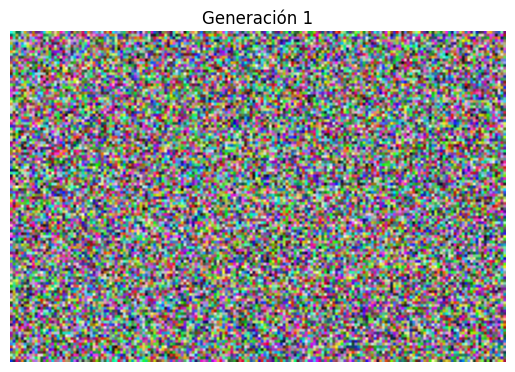

Gen 2: Error = 18366.07
Gen 3: Error = 18357.99
Gen 4: Error = 18294.28
Gen 5: Error = 18294.28
Gen 6: Error = 18272.53
Gen 7: Error = 18227.06
Gen 8: Error = 18215.42
Gen 9: Error = 18205.20
Gen 10: Error = 18205.20
Gen 11: Error = 18190.94


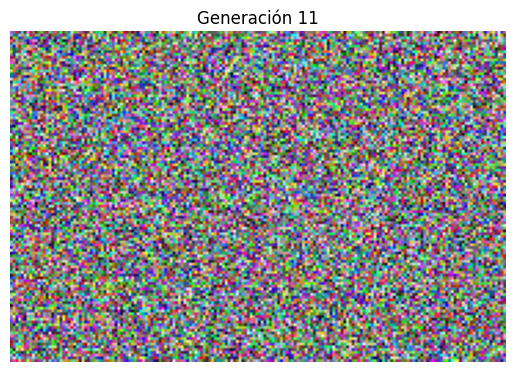

Gen 12: Error = 18101.99
Gen 13: Error = 18096.46
Gen 14: Error = 18092.39
Gen 15: Error = 18079.54
Gen 16: Error = 18046.56
Gen 17: Error = 18008.04
Gen 18: Error = 18008.04
Gen 19: Error = 17942.86
Gen 20: Error = 17942.86
Gen 21: Error = 17942.86


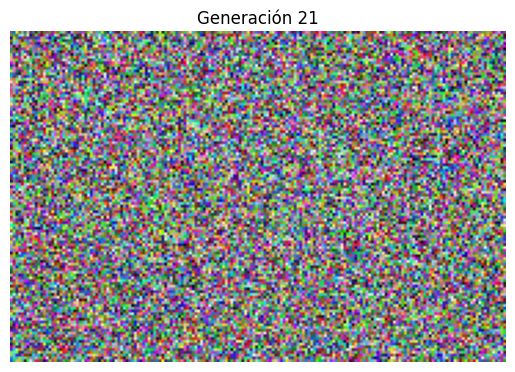

Gen 22: Error = 17932.87
Gen 23: Error = 17910.42
Gen 24: Error = 17910.42
Gen 25: Error = 17910.42
Gen 26: Error = 17888.45
Gen 27: Error = 17874.50
Gen 28: Error = 17874.50
Gen 29: Error = 17857.09
Gen 30: Error = 17857.09
Gen 31: Error = 17851.38


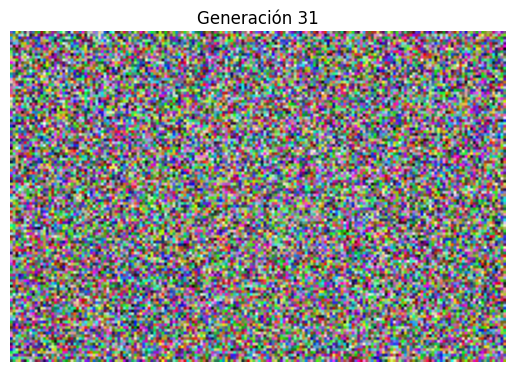

Gen 32: Error = 17831.75
Gen 33: Error = 17831.75
Gen 34: Error = 17820.84
Gen 35: Error = 17816.94
Gen 36: Error = 17798.88
Gen 37: Error = 17798.88
Gen 38: Error = 17775.94
Gen 39: Error = 17775.94
Gen 40: Error = 17773.43
Gen 41: Error = 17773.43


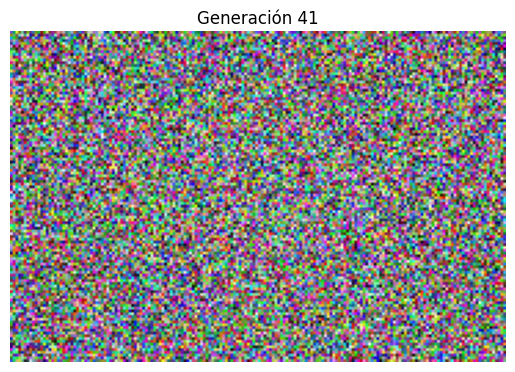

Gen 42: Error = 17756.80
Gen 43: Error = 17756.80
Gen 44: Error = 17742.07
Gen 45: Error = 17742.07
Gen 46: Error = 17725.17
Gen 47: Error = 17725.17
Gen 48: Error = 17725.17
Gen 49: Error = 17724.88
Gen 50: Error = 17722.01
Gen 51: Error = 17707.46


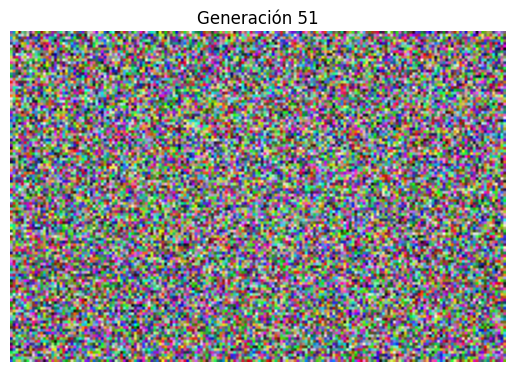

Gen 52: Error = 17707.46
Gen 53: Error = 17696.73
Gen 54: Error = 17696.73
Gen 55: Error = 17683.81
Gen 56: Error = 17681.71
Gen 57: Error = 17681.71
Gen 58: Error = 17666.29
Gen 59: Error = 17666.29
Gen 60: Error = 17666.29
Gen 61: Error = 17666.29


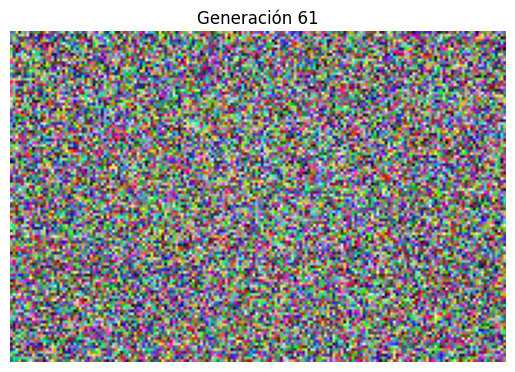

Gen 62: Error = 17662.90
Gen 63: Error = 17660.87
Gen 64: Error = 17651.49
Gen 65: Error = 17636.51
Gen 66: Error = 17625.83
Gen 67: Error = 17619.74
Gen 68: Error = 17619.74
Gen 69: Error = 17605.49
Gen 70: Error = 17592.13
Gen 71: Error = 17592.13


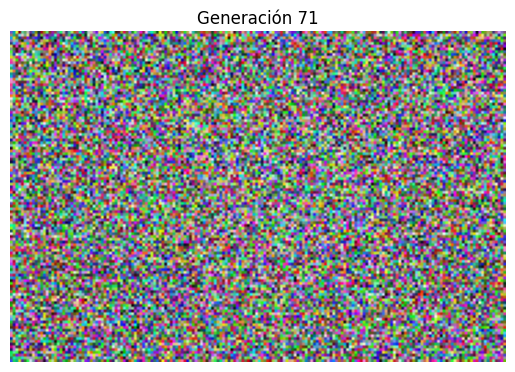

Gen 72: Error = 17592.13
Gen 73: Error = 17586.84
Gen 74: Error = 17574.58
Gen 75: Error = 17574.58
Gen 76: Error = 17574.58
Gen 77: Error = 17574.58
Gen 78: Error = 17556.80
Gen 79: Error = 17545.66
Gen 80: Error = 17545.66
Gen 81: Error = 17542.44


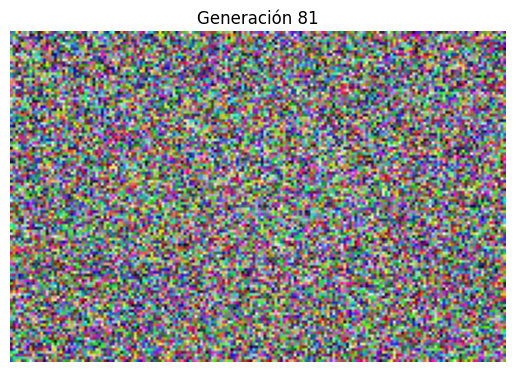

Gen 82: Error = 17530.66
Gen 83: Error = 17525.54
Gen 84: Error = 17520.33
Gen 85: Error = 17510.36
Gen 86: Error = 17506.79
Gen 87: Error = 17502.05
Gen 88: Error = 17502.05
Gen 89: Error = 17502.05
Gen 90: Error = 17496.43
Gen 91: Error = 17490.31


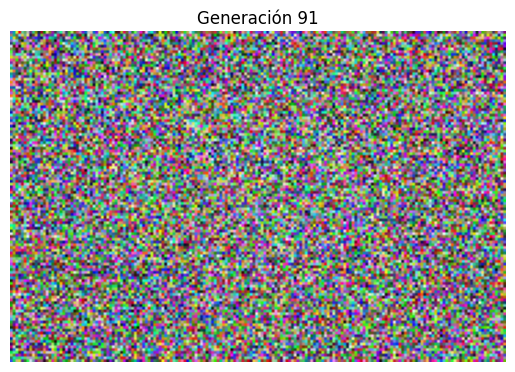

Gen 92: Error = 17483.12
Gen 93: Error = 17483.12
Gen 94: Error = 17475.13
Gen 95: Error = 17475.13
Gen 96: Error = 17475.13
Gen 97: Error = 17475.13
Gen 98: Error = 17474.52
Gen 99: Error = 17473.27
Gen 100: Error = 17470.24


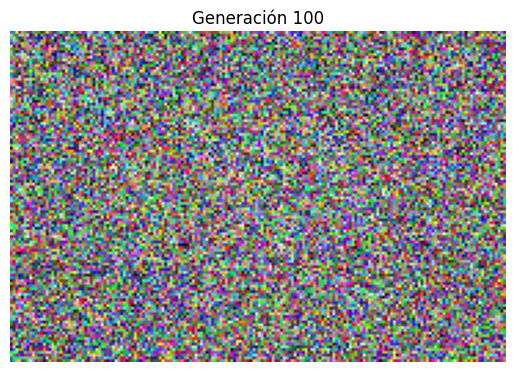

✅ Imagen final guardada como 'mejor_generacion.png'


In [15]:
# ✅ INSTALAR LIBRERÍAS NECESARIAS
!pip install deap matplotlib opencv-python --quiet

# ====== IMPORTAR LIBRERÍAS ======
import numpy as np
import cv2
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import random

# ====== PARÁMETROS ======
ALTURA, ANCHO, CANALES = 120, 180, 3
POBLACION = 50
GENERACIONES = 100
MUTACION_PIXELS = 0.05  # 5% de píxeles mutados
ELITISMO = 1  # Individuos que se conservan

# ====== IMAGEN OBJETIVO ======
# Si tienes una imagen, súbela y reemplaza el nombre abajo
ruta_imagen = "/content/sample_data/imagen_2025-07-04_055014733.png"
objetivo = cv2.imread(ruta_imagen)
objetivo = cv2.resize(objetivo, (ANCHO, ALTURA))
objetivo = cv2.cvtColor(objetivo, cv2.COLOR_BGR2RGB)

# ====== AG SETUP ======
# 🔁 Eliminar clases anteriores si existen
if "FitnessMin" in creator.__dict__:
    del creator.FitnessMin
if "Individual" in creator.__dict__:
    del creator.Individual

# Crear clases DEAP
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

def crear_individuo():
    return np.random.randint(0, 256, (ALTURA, ANCHO, CANALES), dtype=np.uint8)

toolbox.register("individual", tools.initIterate, creator.Individual, crear_individuo)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# ====== FUNCIÓN DE APTITUD ======
def evaluar(ind):
    return (np.mean((ind.astype(np.float32) - objetivo.astype(np.float32)) ** 2),)

toolbox.register("evaluate", evaluar)

# ====== CRUCE: mezcla por máscara aleatoria ======
def cruzar(img1, img2):
    mask = np.random.rand(ALTURA, ANCHO, CANALES) < 0.5
    hijo = np.where(mask, img1, img2)
    return creator.Individual(hijo), creator.Individual(hijo)

toolbox.register("mate", cruzar)

# ====== MUTACIÓN: aleatoria por pixel ======
def mutar(ind):
    mask = np.random.rand(ALTURA, ANCHO, CANALES) < MUTACION_PIXELS
    ruido = np.random.randint(0, 256, (ALTURA, ANCHO, CANALES), dtype=np.uint8)
    ind[mask] = ruido[mask]
    return ind,

toolbox.register("mutate", mutar)
toolbox.register("select", tools.selTournament, tournsize=3)

# ====== INICIALIZACIÓN ======
pop = toolbox.population(n=POBLACION)
halloffame = tools.HallOfFame(ELITISMO, similar=lambda x, y: np.array_equal(x, y))

# ====== EVOLUCIÓN ======
for gen in range(GENERACIONES):
    offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)

    for ind in offspring:
        ind.fitness.values = toolbox.evaluate(ind)

    pop = toolbox.select(offspring, k=len(pop))
    halloffame.update(pop)

    best = halloffame[0]
    print(f"Gen {gen+1}: Error = {best.fitness.values[0]:.2f}")

    # Mostrar imagen cada 10 generaciones
    if gen % 10 == 0 or gen == GENERACIONES - 1:
        plt.imshow(best)
        plt.title(f"Generación {gen+1}")
        plt.axis('off')
        plt.show()

# ====== OPCIONAL: GUARDAR IMAGEN FINAL ======
mejor_rgb = halloffame[0]
mejor_bgr = cv2.cvtColor(mejor_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite("/content/mejor_generacion.png", mejor_bgr)
print("✅ Imagen final guardada como 'mejor_generacion.png'")
